In [1]:
import os
import pandas as pd
import numpy as np

from database_processing_functions import *
from create_data_matrix import *
import matplotlib.pyplot as plt


def load_json(file_path):
    with open(file_path) as f:
        return json.load(f)

In [2]:
'''
This code plots the force-displacement relations for the concrete column
tests in the database
'''

# Get current folder
current_folder = os.getcwd()

# Folder with the JSON files
json_dir = current_folder + '/calibrated_curves/'
   
# Load the database
data = pd.read_csv('data_spiral_wnd.csv')
all_files = os.listdir(json_dir)
maxii = len(all_files)

# print(data)
# For each curve:    
# maxii = 3 #len(data)
all_nd_params = pd.DataFrame()
all_bw_params = pd.DataFrame()


for ii in range(0, maxii):
    
    # (1) Create name of file
    filename = all_files[ii]        
    test_id = filename[-8:-5]

    # (2) Import JSON file as dictionary
    test_data = load_json(os.path.join(json_dir, filename))
    
    # (3) Extract the nondimensional parameters from the csv file (last 6 columns)
    row = data[data['id'] == int(test_id)]
    nd_params = row.iloc[:, -6::] # Get the last 6 columns of the row

    # (4) Get the calibrated parameters from the test_data
    calibrated_params = pd.DataFrame(test_data['best_fit'], index=row.index)

    # (6) Add new_data to all_data
    all_nd_params = pd.concat([all_nd_params, nd_params], axis=0)
    all_bw_params = pd.concat([all_bw_params, calibrated_params], axis=0)
    
    ''' 
    nondim_params = data.iloc[ii, -6::]
    print(nondim_params)

    # Add a column to data
    data['stiff_type'] = np.ones(len(data))

    cases = [267, 269, 270, 271, 272, 273]
    # For ids in cases, set the stiff_type to 0
    data.loc[data['id'].isin(cases), 'stiff_type'] = 0

    # Get last 7 values in data in a new dataframe
    nondim_params = data.iloc[:, -7::]
    
    # Create pairplot of the data withh hue='stiff_type'
    import seaborn as sns
    sns.pairplot(nondim_params, hue='stiff_type')

    # Note: cases are in the median of the distributions for all the possible parameters... Not too good.
    '''

In [3]:
# Check the data
all_nd_params.head()

,ar,lrr,srr,alr,sdr,smr
0,0.181818,0.304296,0.010831,0.058293,0.600000,0.429439
1,0.285714,0.288749,0.010579,0.055613,0.600000,0.528389
2,0.153846,0.298894,0.011766,0.057258,0.600000,0.369010
3,0.183150,0.206522,0.018635,0.003361,1.411765,0.115615
4,0.186567,0.234963,0.016475,0.009809,1.885714,0.123810


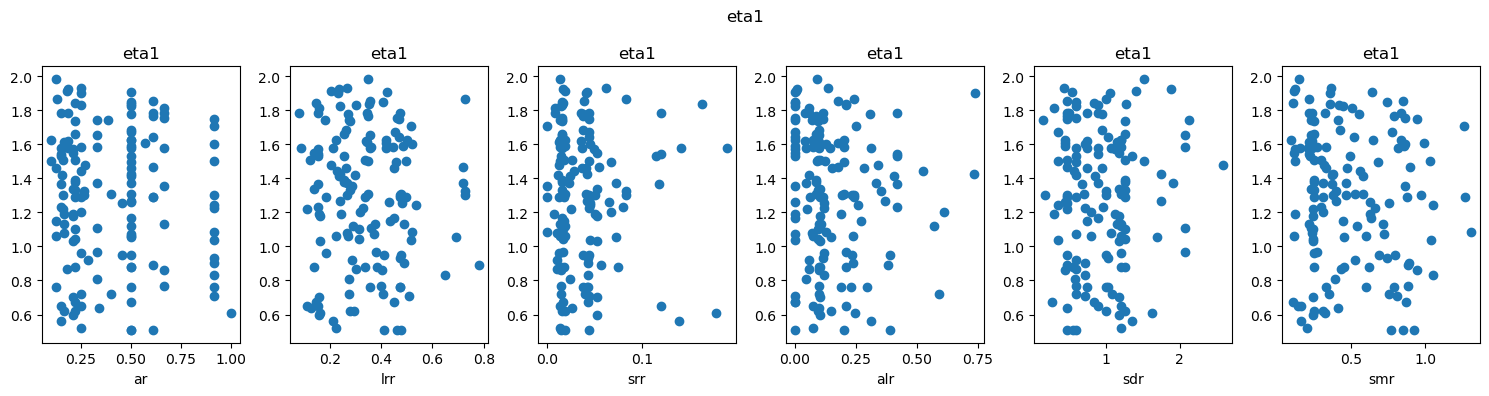

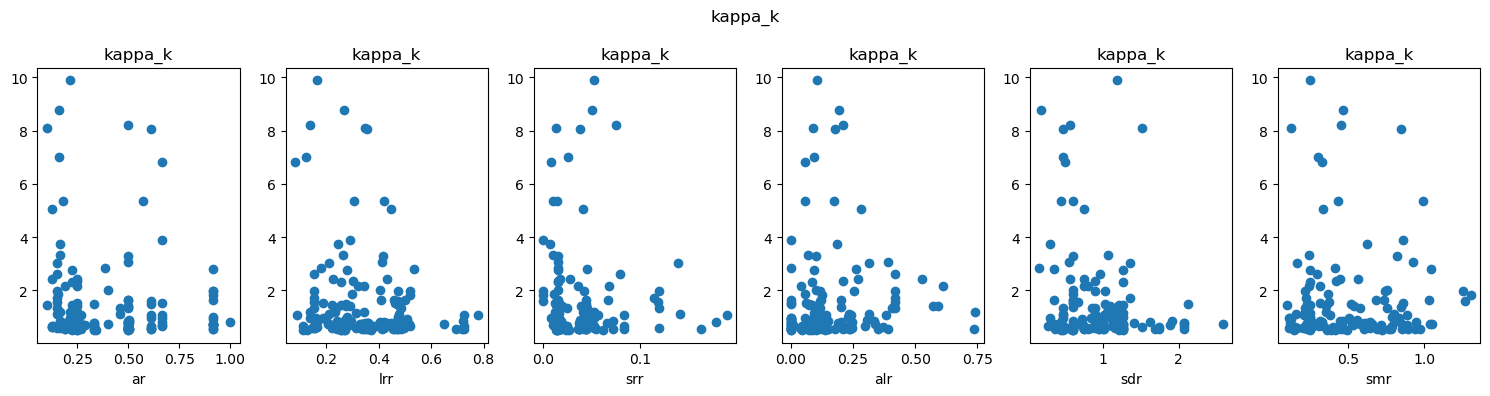

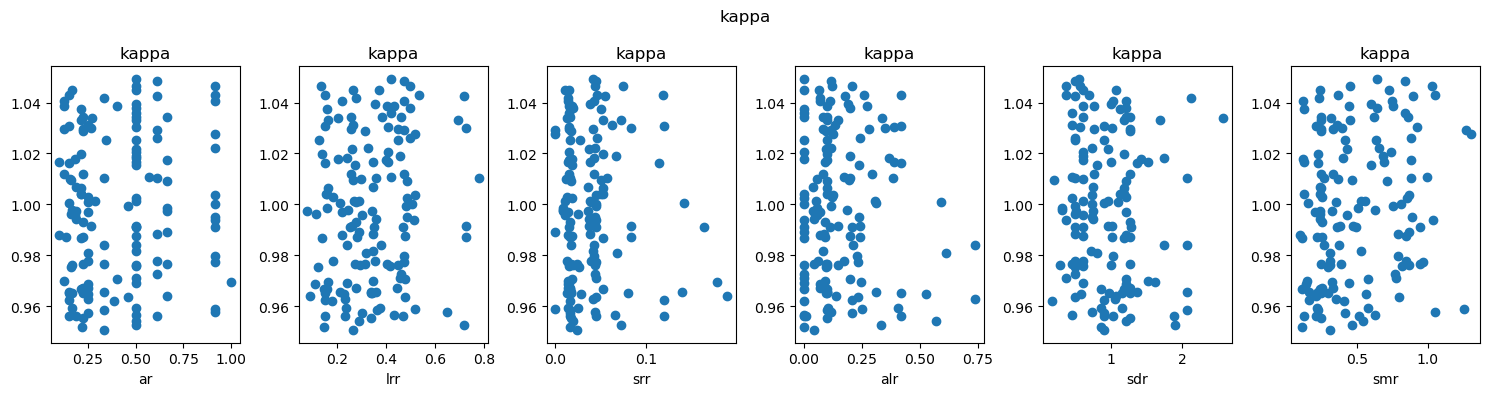

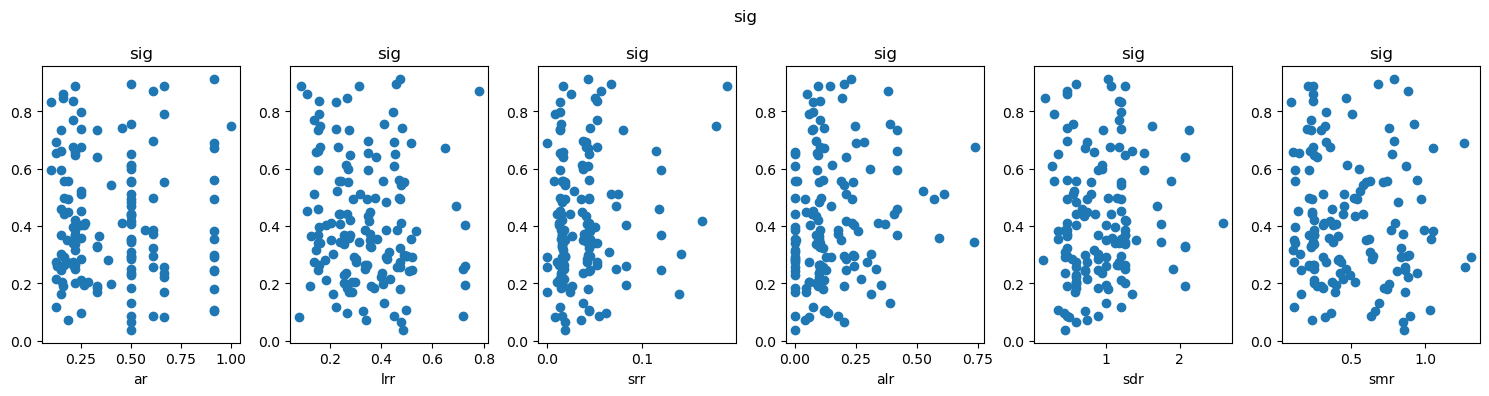

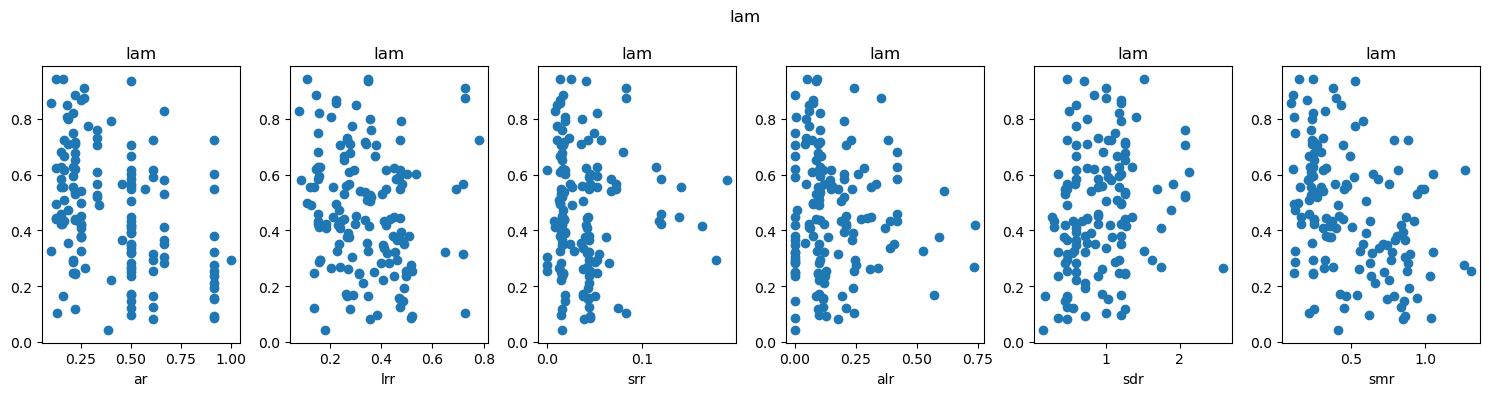

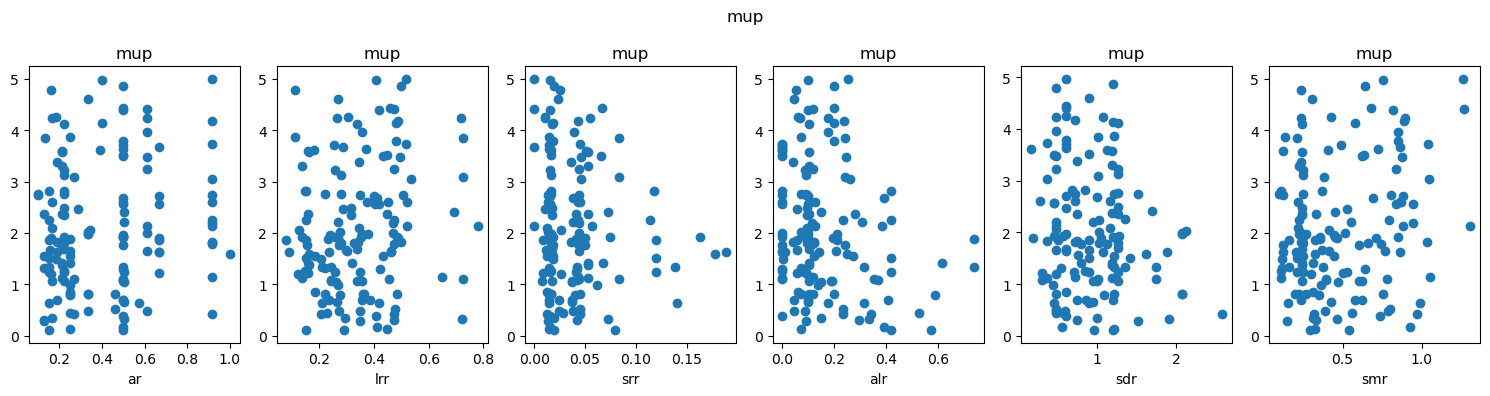

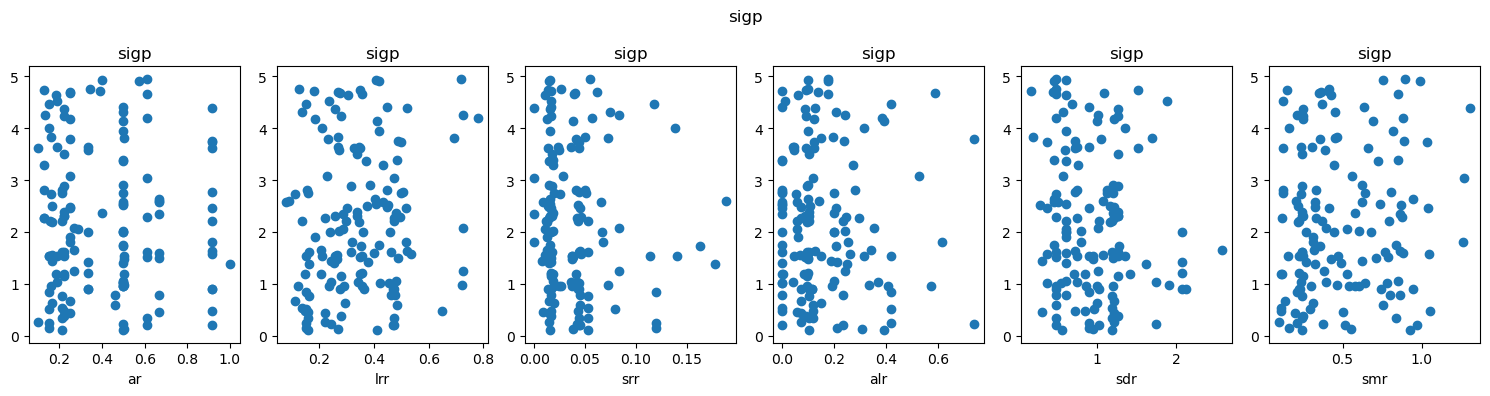

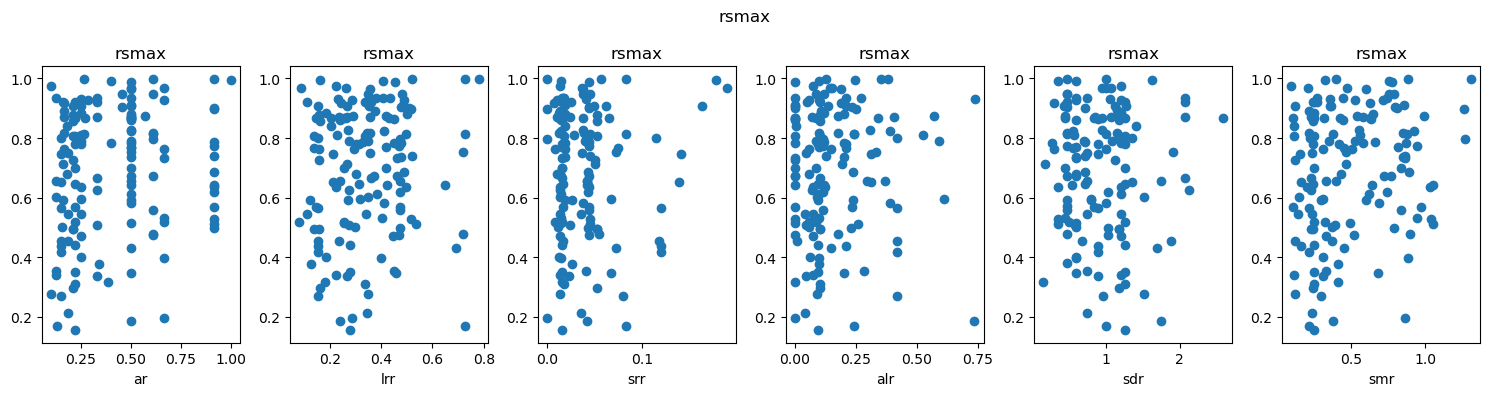

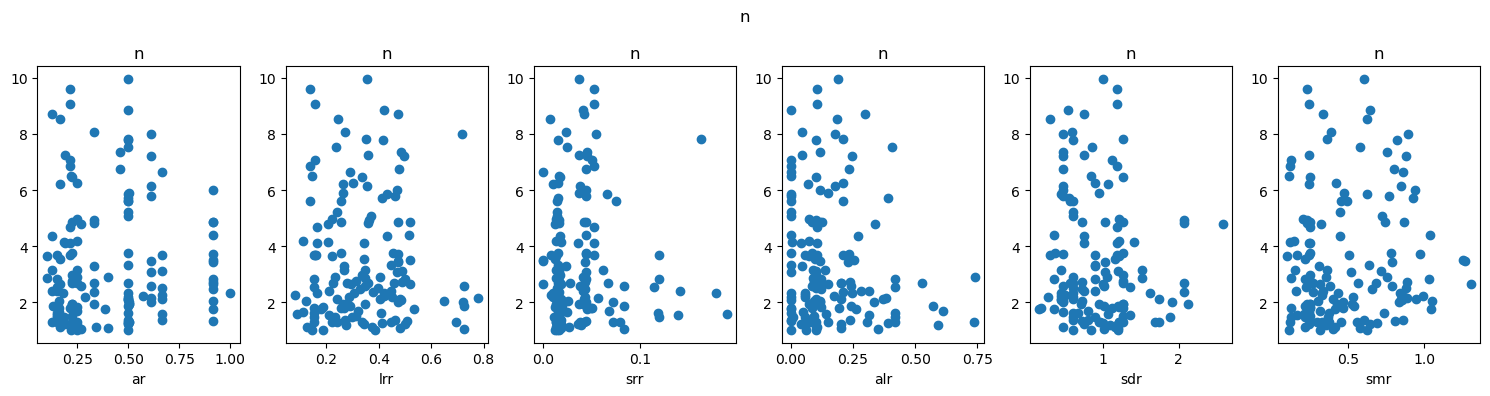

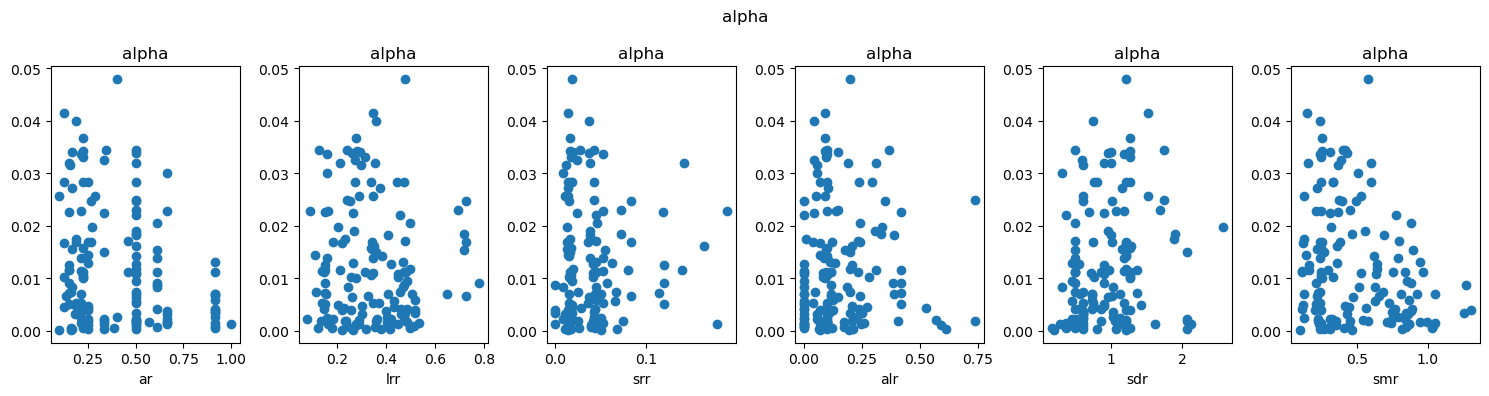

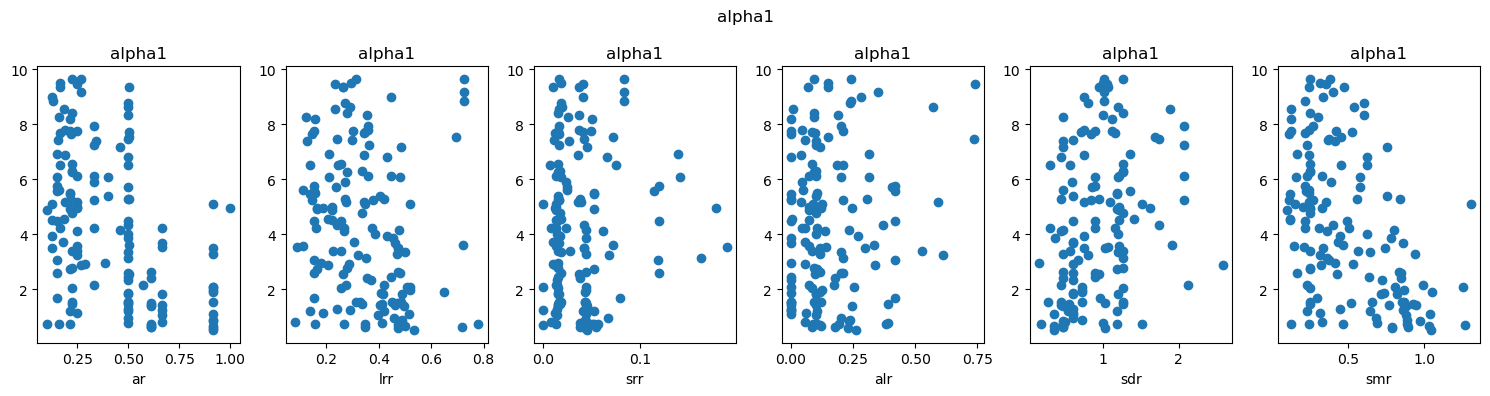

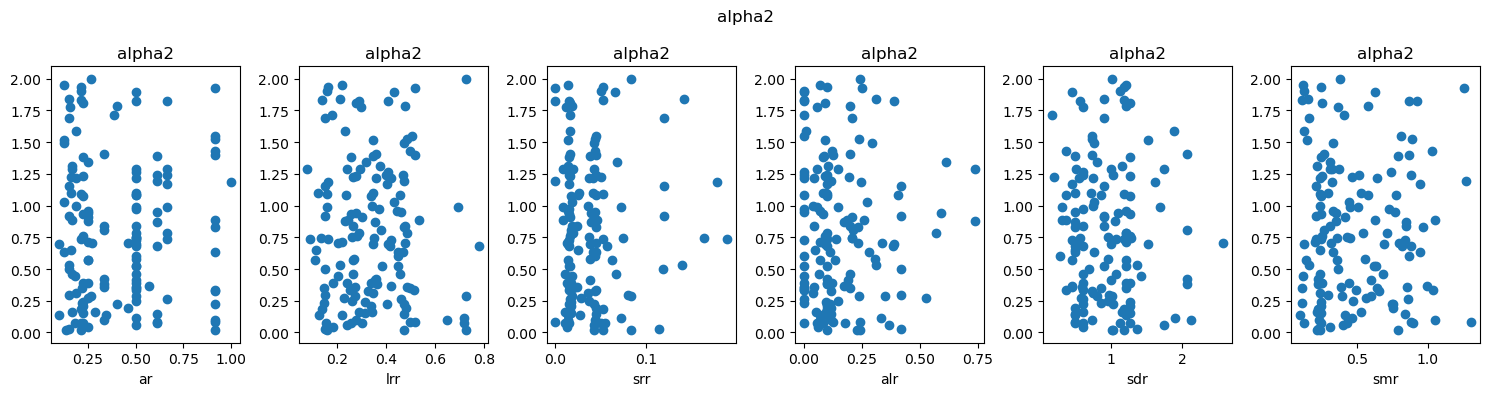

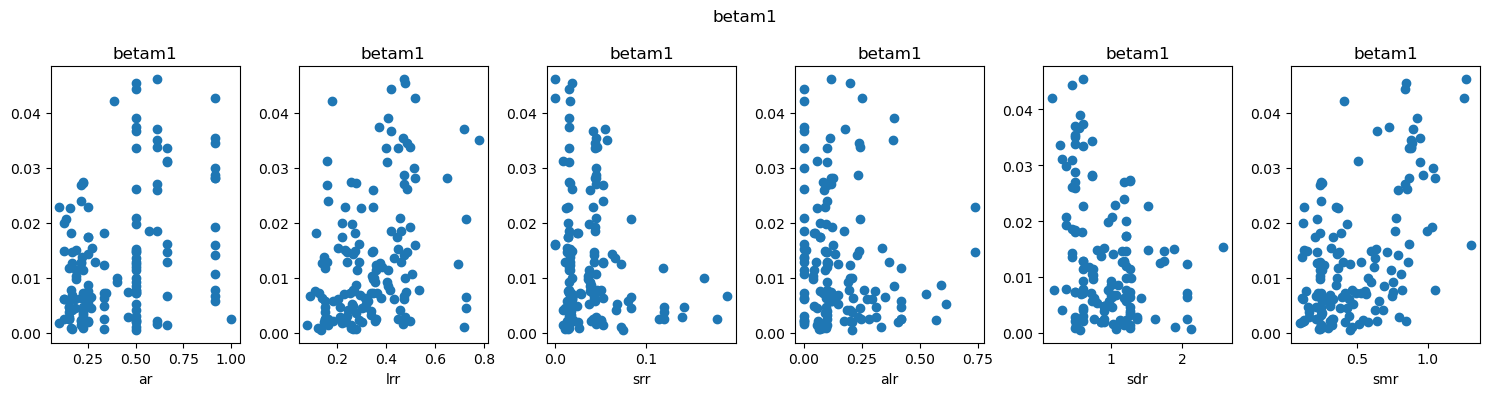

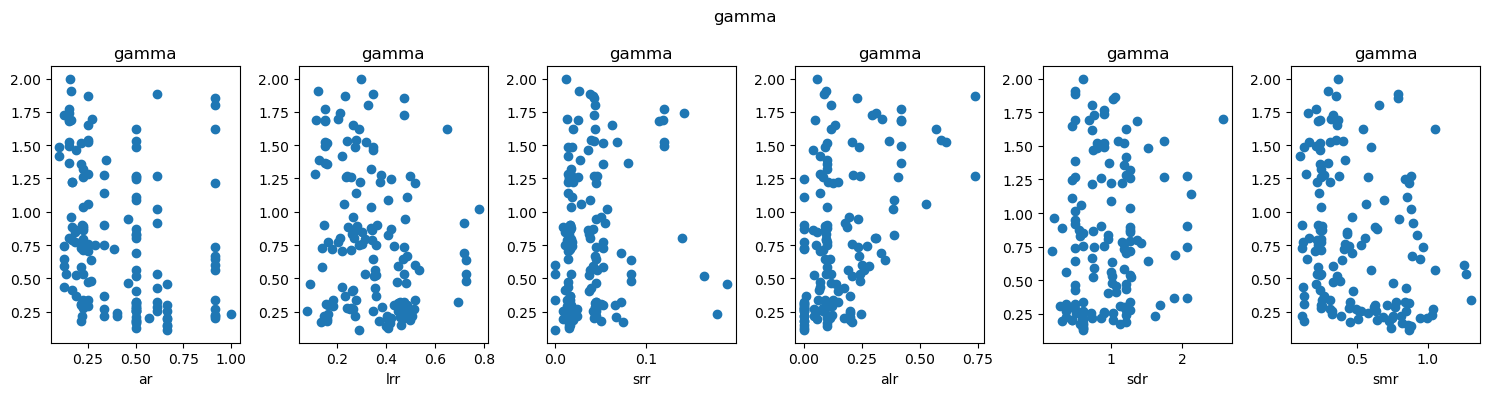

In [6]:
# Create 3D plot of the data

for bw_param in all_bw_params.columns:
    # Get the y values
    y = all_bw_params[bw_param]

    fig = plt.figure(figsize=(15, 4))
    for i in range(1, 7):
        ax = fig.add_subplot(1, 6, i)
        x = all_nd_params.iloc[:, i-1]
        ax.scatter(x, y)
        ax.set_xlabel(all_nd_params.columns[i-1])
        ax.set_title(bw_param)

    fig.suptitle(bw_param)
    fig.tight_layout()
    



In [5]:
'''
# find row in data with the same id as the test_id
row = data[data['id'] == int(test_id)]

row = row.iloc[:, -6::] # Get the last 6 columns of the row
calibrated_params = pd.DataFrame(test_data['best_fit'], index=row.index)
new_data = pd.concat([row.reset_index(drop=True), calibrated_params.reset_index(drop=True)], axis=1)

new_data
'''


"\n# find row in data with the same id as the test_id\nrow = data[data['id'] == int(test_id)]\n\nrow = row.iloc[:, -6::] # Get the last 6 columns of the row\ncalibrated_params = pd.DataFrame(test_data['best_fit'], index=row.index)\nnew_data = pd.concat([row.reset_index(drop=True), calibrated_params.reset_index(drop=True)], axis=1)\n\nnew_data\n"